In [2]:
from pylab import *
import numpy as np
import matplotlib, pylab
from dcll.npamlib import plotLIF
from dcll.pytorch_libdcll import *
import os.path as path

matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['savefig.dpi']=400.
matplotlib.rcParams['font.size']=14.0
matplotlib.rcParams['figure.figsize']=(5.0,3.5)
matplotlib.rcParams['axes.formatter.limits']=[-10,10]
matplotlib.rcParams['axes.labelsize']= 14.
matplotlib.rcParams['figure.subplot.bottom'] = .2
matplotlib.rcParams['figure.subplot.left'] = .2       

In [25]:
all_layers_folder_id = range(1, 9, 2)
skip_first_folder_id = range(2, 9, 2)
base_folder = "../Paper_results/{:03d}__04-10-2018"
all_layers_folders = [
    base_folder.format(n) for n in all_layers_folder_id
]
skip_first_folders = [
    base_folder.format(n) for n in skip_first_folder_id
]
print(list(all_layers_folder_id))
print(list(skip_first_folder_id))

[1, 3, 5, 7]
[2, 4, 6, 8]


In [28]:
import pickle
    
def plot_accuracy(directories, skip_first=False):
    args = np.load(path.join(directories[0],"args.pkl"))
    batch_size = args['batch_size']
    n_test_interval = args['n_test_interval']
    # assert(skip_first == args['skip_first'])
 
    acc_test = [ np.load(path.join(d, "acc_test.npy")) for d in directories ]
    acc_test = np.array(acc_test)
    print("(n_runs, n_epoch/test_interval, n_batch_test, n_layers): {}".format(acc_test.shape))
    n_epoch = (acc_test.shape[1] - 1) * n_test_interval + 1
    n_layers = acc_test.shape[3]
    
    parameters = pickle.load(open(path.join(directories[0], 'parameters_{}.pkl'.format(n_epoch-1)), 'rb'))
    n_weights = 0
    n_bias = 0
    for k, v in parameters.items():
        if skip_first and k.startswith('layer1'):
            continue
        elif k.endswith('.i2h.weight'):
            n_weights += v.size
        elif k.endswith('.i2h.bias'):
            n_bias +=v.size            
    print("number of trained weights: {} bias: {}".format(n_weights, n_bias))
    print("number of test samples: {}".format(acc_test.shape[2] * batch_size))

    print(acc_test[0, 15, 1, 2])
    test_epochs = np.arange(0, n_epoch, n_test_interval, dtype='int') + 1
    # mean over the multiple test batches
    weighted_acc = np.mean(acc_test, axis=2)
    # mean over the multiple runs with different seeds
    mean_acc = np.mean(weighted_acc, axis=0)
    std_acc = np.std(weighted_acc, axis=0)
    
    print("Accuracy: {}".format(mean_acc[:, -1]))
    
    fig = figure()
    ax = subplot(111)
    n_updates_tick = 1
    x = test_epochs*batch_size//n_updates_tick
    
    for l in range(n_layers):
        if skip_first and l==0:
             linestyle='--'
        else:
            linestyle='-'
        ax.plot(x, 1-mean_acc[:,l],
                linewidth=3, linestyle=linestyle,
                alpha=.75, label = 'Layer {}'.format(l+1))
        ax.fill_between(x, 1-mean_acc[:,l] - std_acc[:,l], 1-mean_acc[:,l] + std_acc[:,l],
                       alpha=.2)
        
    ax.set_yticks(np.arange(0,1.1,0.1))
    ax.grid()
    legend()
    ax.set_ylabel('Error[%]')
    ax.set_xlabel('Training Samples [{}]'.format(n_updates_tick))
    tight_layout()
    ax.set_ylim([0,1.])
    ax.set_xlim(batch_size, n_epoch*batch_size // n_updates_tick)
    savefig(path.join(path.dirname(directories[0]), 'convergence_mnist_skip{}.png'.format(skip_first)), dpi=300, frameon=False)

# Accuracy of the network

(n_runs, n_epoch/test_interval, n_batch_test, n_layers): (4, 34, 24, 3)
number of trained weights: 57232 bias: 72
number of test samples: 1536
0.953125
Accuracy: [0.46614583 0.74527995 0.79475911 0.82763672 0.85221354 0.85611979
 0.8741862  0.87141927 0.88134766 0.87695312 0.89355469 0.89453125
 0.89860026 0.90966797 0.9148763  0.91422526 0.90917969 0.92285156
 0.92057292 0.91943359 0.9132487  0.91959635 0.92643229 0.92789714
 0.92301432 0.92431641 0.92773438 0.92464193 0.92529297 0.9288737
 0.93066406 0.92936198 0.92708333 0.92740885]


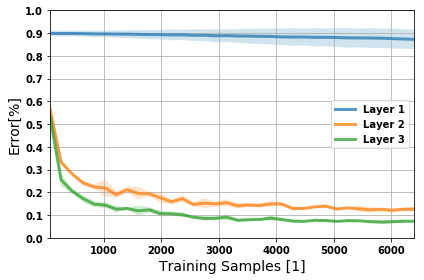

In [29]:
plot_accuracy(all_layers_folders)

# Accuracy of the network when first layer is disabled

(n_runs, n_epoch/test_interval, n_batch_test, n_layers): (4, 34, 24, 3)
number of trained weights: 56448 bias: 56
number of test samples: 1536
0.9375
Accuracy: [0.46582031 0.74593099 0.79313151 0.82389323 0.84733073 0.8601888
 0.87467448 0.875      0.88069661 0.87874349 0.89274089 0.89599609
 0.89648438 0.90690104 0.91194661 0.91292318 0.9078776  0.91975911
 0.91699219 0.92480469 0.91975911 0.91813151 0.92561849 0.93180339
 0.92252604 0.92561849 0.93343099 0.921875   0.92871094 0.93277995
 0.92903646 0.93310547 0.92936198 0.9288737 ]


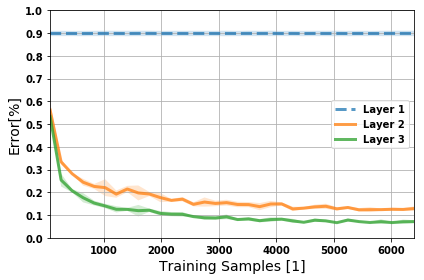

In [30]:
plot_accuracy(skip_first_folders, skip_first=True)

In [31]:
acc_test = [ np.load(path.join(d, "acc_test.npy")) for d in all_layers_folders ]
acc_test = np.array(acc_test)

In [9]:
acc_test

array([[[[0.078125, 0.3125  , 0.359375],
         [0.078125, 0.3125  , 0.359375],
         [0.078125, 0.3125  , 0.359375],
         ...,
         [0.078125, 0.3125  , 0.359375],
         [0.078125, 0.3125  , 0.359375],
         [0.078125, 0.3125  , 0.359375]],

        [[0.0625  , 0.5625  , 0.78125 ],
         [0.0625  , 0.5625  , 0.78125 ],
         [0.0625  , 0.5625  , 0.78125 ],
         ...,
         [0.0625  , 0.5625  , 0.796875],
         [0.0625  , 0.5625  , 0.796875],
         [0.0625  , 0.5625  , 0.796875]],

        [[0.140625, 0.53125 , 0.90625 ],
         [0.140625, 0.53125 , 0.90625 ],
         [0.140625, 0.53125 , 0.90625 ],
         ...,
         [0.140625, 0.53125 , 0.90625 ],
         [0.140625, 0.53125 , 0.90625 ],
         [0.140625, 0.53125 , 0.90625 ]],

        ...,

        [[0.15625 , 0.9375  , 1.      ],
         [0.15625 , 0.9375  , 1.      ],
         [0.15625 , 0.9375  , 1.      ],
         ...,
         [0.15625 , 0.9375  , 1.      ],
         [0.15625 , 0.

In [10]:
acc_test.shape

(10, 30, 24, 3)

In [12]:
np.mean(acc_test, axis=2).shape

(10, 30, 3)

In [27]:
all_layers_folders[0]

'../Paper_results/001__01-10-2018'